## 1. 제조업 데이터 ##

## 1) 데이터 전처리

In [33]:
import pandas as pd
df = pd.read_csv('example_1.csv', sep=";")
df.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


In [34]:
df.shape

(1063, 11)

전체 데이터셋의 행은 1,063개, 행은 11개로 이루어져 있습니다.

In [35]:
df.dtypes

datetime                object
Accelerometer1RMS      float64
Accelerometer2RMS      float64
Current                float64
Pressure               float64
Temperature            float64
Thermocouple           float64
Voltage                float64
Volume Flow RateRMS    float64
anomaly                float64
changepoint            float64
dtype: object

데이터들은 문자 등 혼합된 데이터 타입인 object 1개와 소숫점 숫자 타입인 float 10개로 이루어져 있습니다.

In [36]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

datetime               datetime64[ns]
Accelerometer1RMS             float64
Accelerometer2RMS             float64
Current                       float64
Pressure                      float64
Temperature                   float64
Thermocouple                  float64
Voltage                       float64
Volume Flow RateRMS           float64
anomaly                       float64
changepoint                   float64
dtype: object

datetime이 시간형식이기 때문에 object 자료를 datetime 형식으로 변경하였습니다.

In [37]:
df.set_index('datetime')

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0000,0.0,0.0
2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0000,0.0,0.0
2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0000,0.0,0.0
2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0000,0.0,0.0
2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-09 16:36:26,0.026954,0.040592,1.200720,0.054711,67.6181,24.2314,245.247,32.0000,0.0,0.0
2020-03-09 16:36:27,0.027371,0.040530,1.318550,-0.273216,67.8733,24.2234,243.576,32.0000,0.0,0.0
2020-03-09 16:36:28,0.027557,0.039432,1.068740,0.054711,67.6173,24.2315,239.957,31.9603,0.0,0.0


In [38]:
#각 열별 null 값은 0개로 나타났습니다.
df.isnull().sum()

datetime               0
Accelerometer1RMS      0
Accelerometer2RMS      0
Current                0
Pressure               0
Temperature            0
Thermocouple           0
Voltage                0
Volume Flow RateRMS    0
anomaly                0
changepoint            0
dtype: int64

In [39]:
import matplotlib.pyplot as plt

In [40]:
df.count()

datetime               1063
Accelerometer1RMS      1063
Accelerometer2RMS      1063
Current                1063
Pressure               1063
Temperature            1063
Thermocouple           1063
Voltage                1063
Volume Flow RateRMS    1063
anomaly                1063
changepoint            1063
dtype: int64

## 2) 데이터 분석

In [41]:
df['anomaly'].value_counts()

0.0    730
1.0    333
Name: anomaly, dtype: int64

In [43]:
df.value_counts(normalize=True)

datetime             Accelerometer1RMS  Accelerometer2RMS  Current   Pressure   Temperature  Thermocouple  Voltage  Volume Flow RateRMS  anomaly  changepoint
2020-03-09 16:16:30  0.027545           0.041127           0.673506   0.054711  67.8345      24.3164       240.513  32.0000              0.0      0.0            0.000941
2020-03-09 16:29:15  0.028317           0.039302           1.511490   0.054711  68.8670      24.2606       251.910  29.0400              1.0      0.0            0.000941
2020-03-09 16:29:00  0.028112           0.039291           0.753779   0.054711  68.5316      24.2553       224.957  29.0000              1.0      0.0            0.000941
2020-03-09 16:29:01  0.027840           0.037773           0.733406   0.054711  68.7222      24.2595       233.717  29.0400              1.0      0.0            0.000941
2020-03-09 16:29:02  0.027981           0.038172           1.000760  -0.273216  68.6238      24.2606       230.084  29.9613              1.0      0.0            0

<AxesSubplot:>

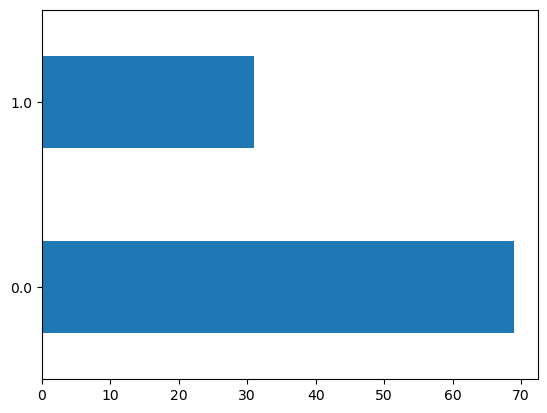

In [44]:
ano_normal = round(df['anomaly'].value_counts(normalize=True)*100)
ano_normal.plot.barh()

In [45]:
from matplotlib import dates
import seaborn as sns
import plotly.express as px

In [46]:
fig = px.line(df, x='datetime', y='Accelerometer1RMS', markers='r', symbol="anomaly")

fig.show()

In [47]:
fig = px.line(df, x='datetime', y='Accelerometer2RMS', markers='r', symbol="anomaly")

fig.show()

In [48]:
fig = px.line(df, x='datetime', y='Current', markers='r', symbol="anomaly")

fig.show()

In [49]:
fig = px.line(df, x='datetime', y='Pressure', markers='r', symbol="anomaly")

fig.show()

In [50]:
fig = px.line(df, x='datetime', y='Temperature', markers='r', symbol="anomaly")

fig.show()

In [51]:
fig = px.line(df, x='datetime', y='Thermocouple', markers='r', symbol="anomaly")

fig.show()

In [52]:
fig = px.line(df, x='datetime', y='Voltage', markers='r', symbol="anomaly")

fig.show()

In [53]:
fig = px.line(df, x='datetime', y='Volume Flow RateRMS', markers='r', symbol="anomaly")

fig.show()

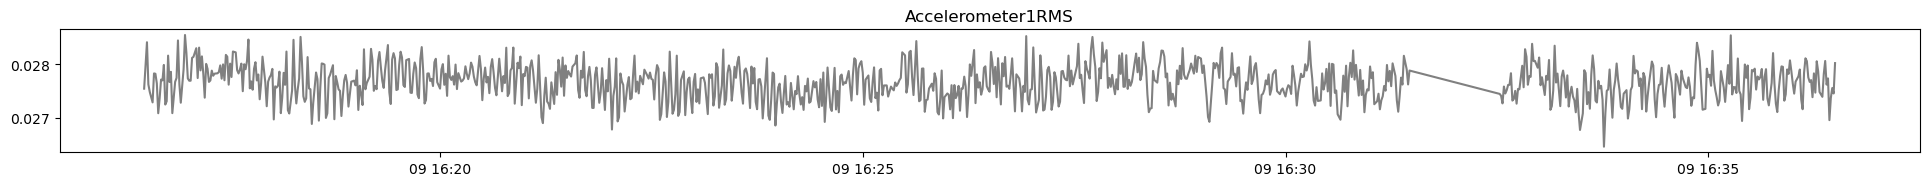

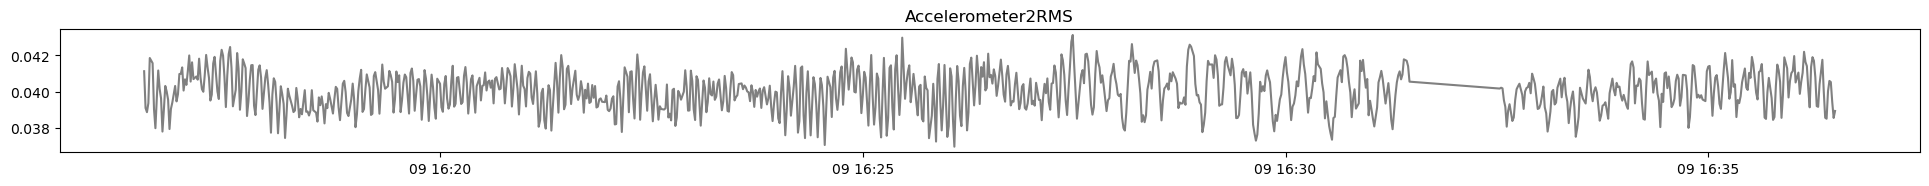

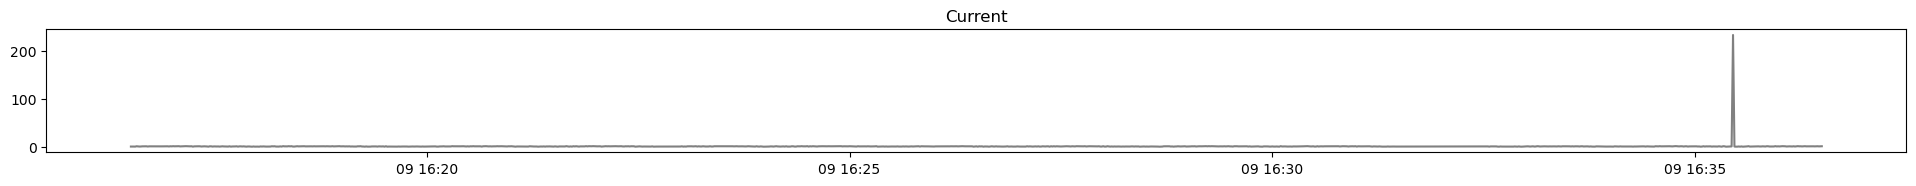

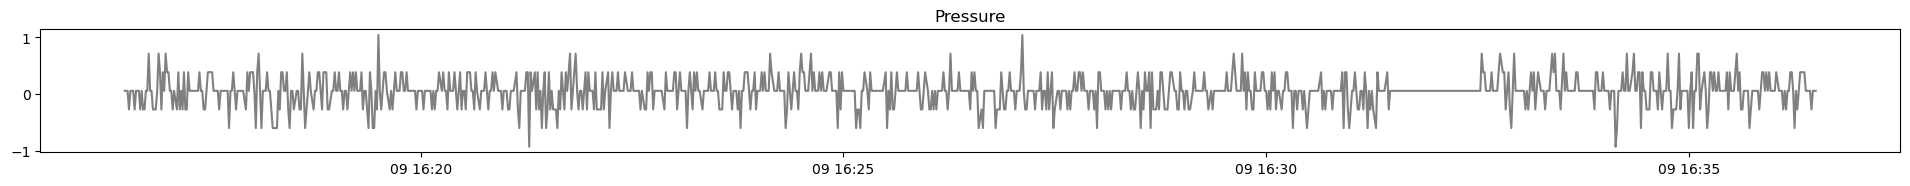

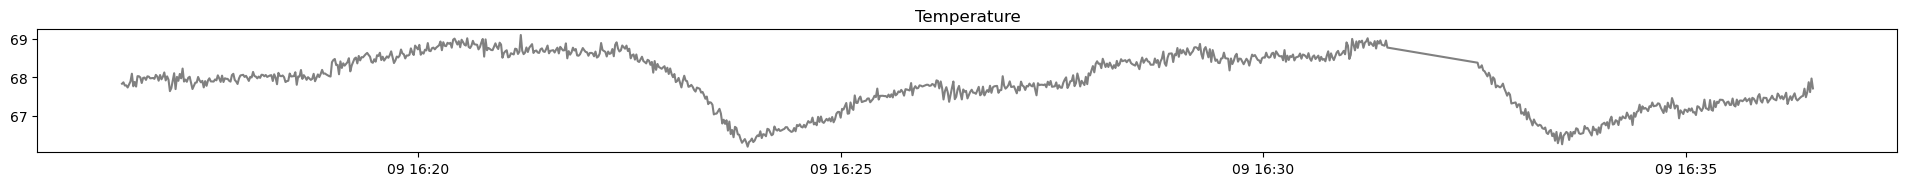

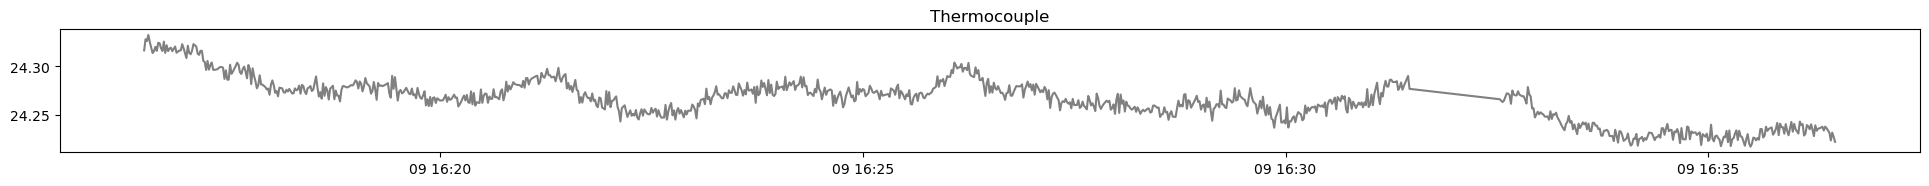

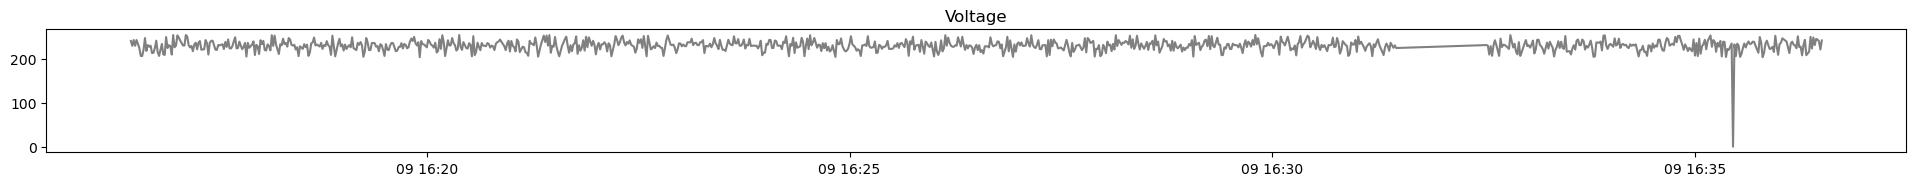

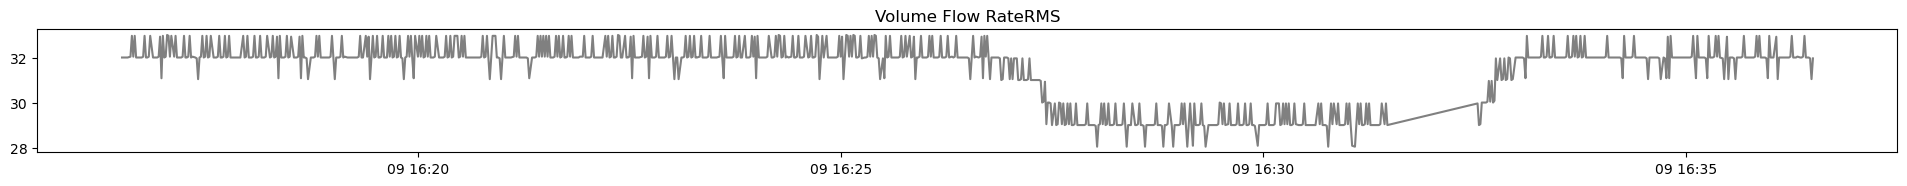

In [54]:
# 전체 데이터의 개수에서 'anomaly'가 차지하는 비율
import matplotlib.pyplot as plt

for v, i in  enumerate(df.columns[1:9]) :
  plt.figure(figsize=(24,15))
  plt.subplot(8, 1, v+1)
  plt.plot(df['datetime'], df[i], color='grey');
  plt.title(i)

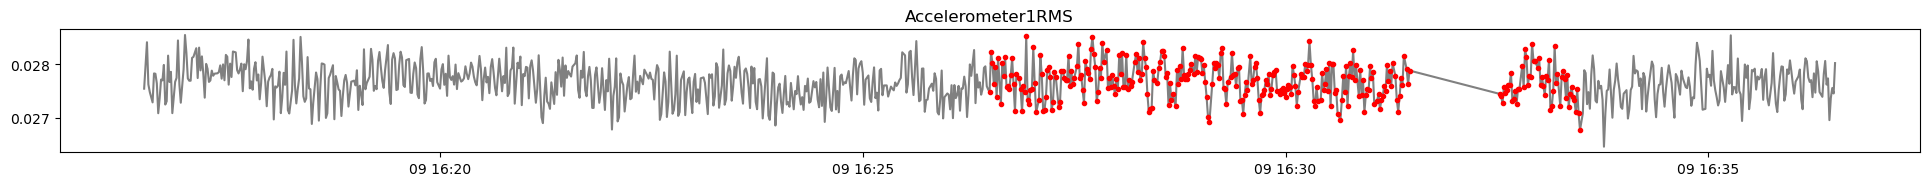

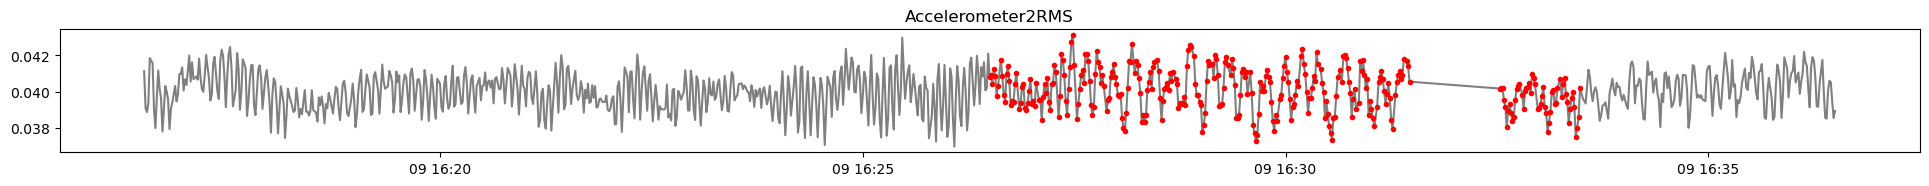

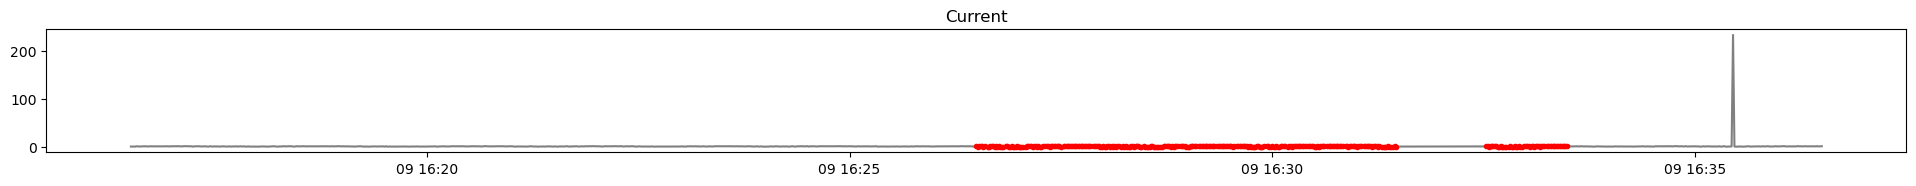

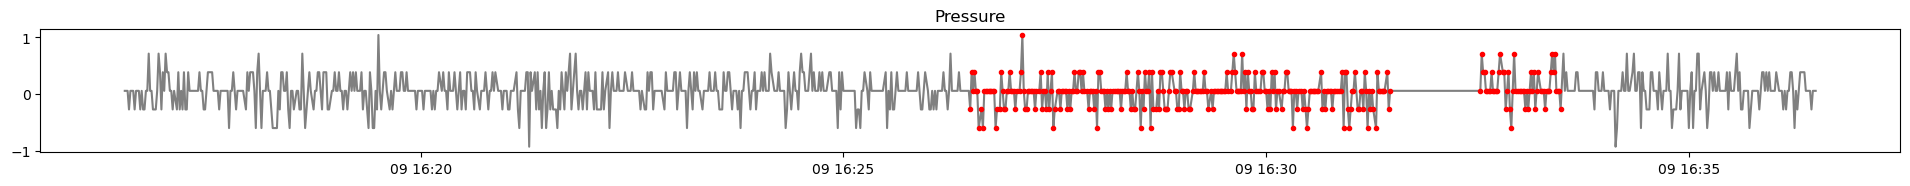

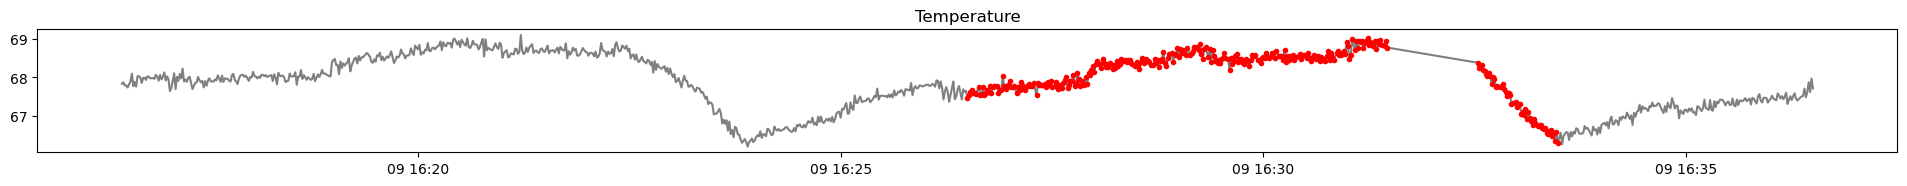

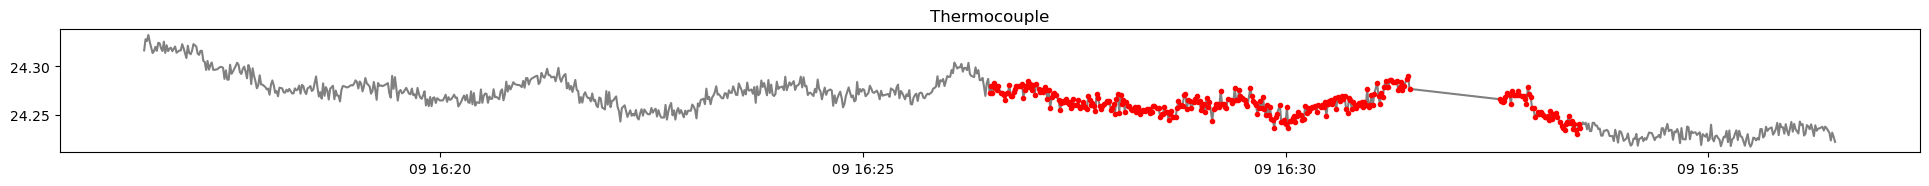

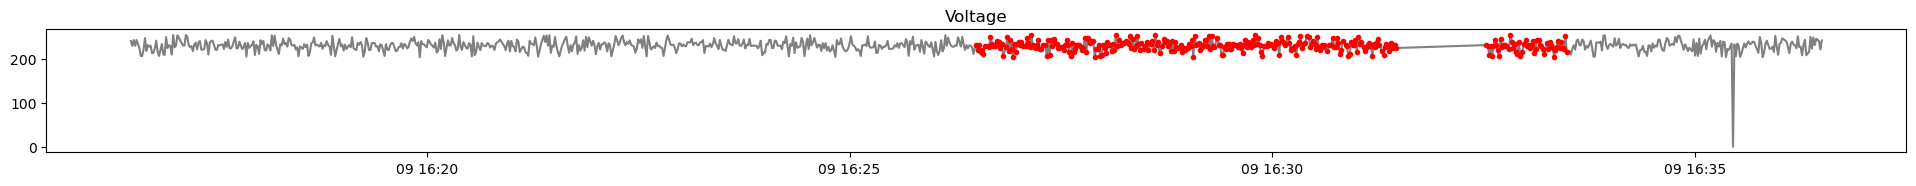

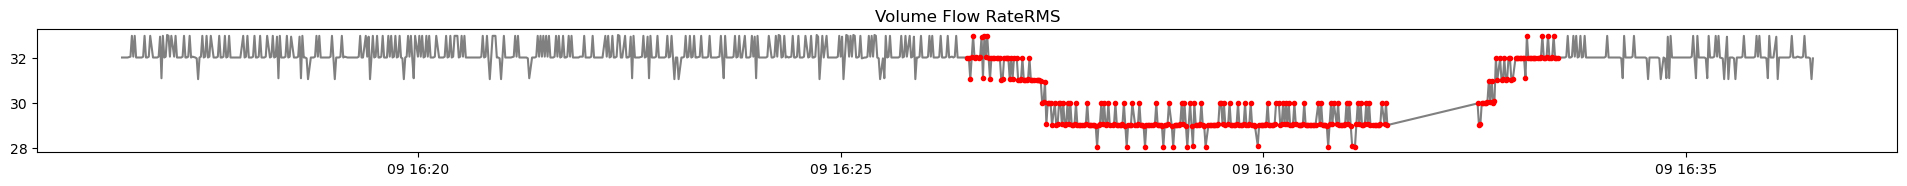

In [55]:
# Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
import matplotlib.pyplot as plt

df['datetime'] = pd.to_datetime(df['datetime'])

for v, i in  enumerate(df.columns[1:9]) :
  plt.figure(figsize=(24,15))
  plt.subplot(8, 1, v+1)
  plt.plot(df['datetime'], df[i], color='grey');
  plt.plot(df[df['anomaly']==1]['datetime'], df[df['anomaly']==1][i], 'o', color='red', markersize=3 );
  plt.title(i)

## 2. 금융 데이터 ##

## 1) 데이터 전처리

In [56]:
import pandas as pd
df = pd.read_csv('example_2.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [57]:
# 전체 데이터는 6,362,620개의 행과 11개의 열로 구성되어 있었습니다.
df.shape

(6362620, 11)

In [58]:
# 데이터의 형태는 숫자형 int 3개, 혼합형 object 3개, float 5개로 구성되어 있습니다.
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [59]:
# 각 column별로 null 값은 0개였습니다.
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## 2) 데이터 분석

In [60]:
# 'isFraud' Column 활용해, 전체 사기율(%) 계산
df.groupby('isFraud').value_counts(normalize=True)

isFraud  step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFlaggedFraud
0        306   CASH_OUT  239151.32   C2127545846  90283.00       0.0             C325585890   353255.68       592407.00       0                 1.573711e-07
                         239229.73   C471083649   0.00           0.0             C1179784375  1619788.72      1859018.45      0                 1.573711e-07
                         239214.88   C1996894602  482.00         0.0             C679970513   0.00            239214.88       0                 1.573711e-07
                         239214.62   C2125721578  0.00           0.0             C1305990933  769086.68       1008301.30      0                 1.573711e-07
                         239203.44   C1230858407  11022.00       0.0             C1544673888  399083.09       638286.53       0                 1.573711e-07
                                                                          

In [62]:
# 'isFraud' Column 활용해, 전체 사기율(%) 계산
print(round(df['isFraud'].value_counts(normalize=True)[1]*100,2),"%")

0.13 %


In [61]:
dftype = df['type'].value_counts()

# 숫자를 천 단위 구분 기호가 있는 문자열로 변환
dftype_str = dftype.apply(lambda x: "{:,}".format(x))  
dftype_str

CASH_OUT    2,237,500
PAYMENT     2,151,495
CASH_IN     1,399,284
TRANSFER      532,909
DEBIT          41,432
Name: type, dtype: object

In [66]:
# 'type'에 따른 사기율(%) 계산.
df[['type','isFraud']].value_counts(normalize=True)

type      isFraud
CASH_OUT  0          0.351016
PAYMENT   0          0.338146
CASH_IN   0          0.219923
TRANSFER  0          0.083112
DEBIT     0          0.006512
CASH_OUT  1          0.000647
TRANSFER  1          0.000644
dtype: float64

In [67]:
# CASH_OUT과 TRANSFER의 CASE만 사기 거래가 존재
print(f"CASH_OUT : {df[['type','isFraud']].value_counts(normalize=True)[5]*100}%")
print(f"TRANSFER : {df[['type','isFraud']].value_counts(normalize=True)[6]*100}%")

CASH_OUT : 0.06469033197016323%
TRANSFER : 0.06439171284785199%


In [68]:
df_Y = df[(df['isFraud'] == 1) & (df['amount'] <= 1517771)]['amount'].sample(1000)
df_N = df[(df['isFraud'] == 0) & (df['amount'] <= 1517771)]['amount'].sample(1000)

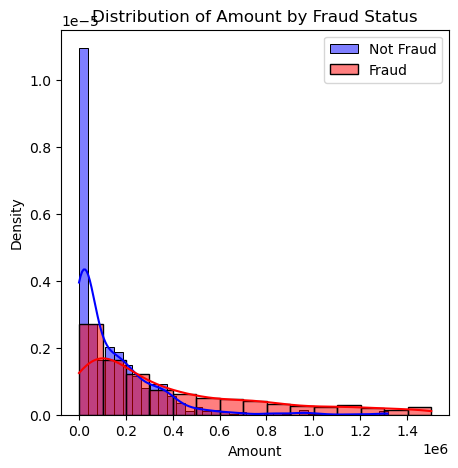

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

# 사기거래가 아닌 경우의 amount 분포 플롯
sns.histplot(df_N, kde=True, label='Not Fraud', color='blue', stat="density")

# 사기거래인 경우의 amount 분포 플롯
sns.histplot(df_Y, kde=True, label='Fraud', color='red', stat="density")

plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Distribution of Amount by Fraud Status')
plt.legend()

plt.show()

## 3. 게임 데이터 ##

## 1) 데이터 전처리

In [72]:
import pandas as pd
df = pd.read_csv('example_3.csv')
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,24,0,0,5,247.30,2,0,4,...,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,1,440875,1,1,0,37.65,1,1,0,...,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,2,878242,2,0,1,93.73,1,0,2,...,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,3,1319841,3,0,0,95.88,0,0,0,...,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,4,1757883,4,0,1,0.00,0,0,1,...,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


In [73]:
# 전체 데이터는 6,225,249개의 행과 27개의 열로 구성됨
df.shape

(6225249, 27)

In [74]:
# 데이터의 형태는 float 6개, 나머지 변수들은 숫자형 int로 구성됨
df.dtypes

Unnamed: 0           int64
Id                   int64
groupId              int64
matchId              int64
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
maxPlace             int64
numGroups            int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [75]:
# 각 column별로 null 값은 0개
df.isnull().sum()

Unnamed: 0               0
Id                       0
groupId                  0
matchId                  0
assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
killPoints               0
kills                    0
killStreaks              0
longestKill              0
maxPlace                 0
numGroups                0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPoints                0
winPlacePerc       1867913
dtype: int64

## 2) 데이터 분석

In [76]:
# totalDistance가 하위 10%인 Data set

df['_totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

df_distance = df[df['_totalDistance'] <= df['_totalDistance'].quantile(0.10)]
df_distance.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance
3,3,3,1319841,3,0,0,95.88,0,0,0,...,0.0,0,0.0,0,0,21.490,1,1489,0.1146,21.490
44,44,44,1540626,44,0,0,0.00,0,0,0,...,0.0,0,0.0,0,0,12.430,1,1470,0.1064,12.430
68,68,68,2564268,68,0,0,0.00,0,0,0,...,0.0,0,0.0,0,0,11.880,0,1489,0.1111,11.880
77,77,77,2604077,77,0,0,0.00,0,0,0,...,0.0,0,0.0,0,0,6.322,1,1438,0.0000,6.322
85,85,85,2638861,85,0,0,85.41,0,0,0,...,0.0,0,0.0,0,0,36.190,2,1465,0.0440,36.190


In [77]:
# Data set에서 weaponsAcquired가 상위 1%인 버그의심 유저 수를 출력
df_bug = df_distance[df_distance['weaponsAcquired']  >= df_distance['weaponsAcquired'].quantile(0.99)]
len(df_bug)

15300